In [17]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [18]:
schema_dict = { 'area_fips':str,
                'own_code':str,
                'industry_code':str,
                'agglvl_code':str,
                'size_code':str,
                'year':int,
                'qtr':int,
                'disclosure_code':str,
                'area_title':str,
                'own_title':str,
                'industry_title':str,
                'agglvl_title':str,
                'size_title':str,
                'qtrly_estabs':int,
                'month1_emplvl':int,
                'month2_emplvl':int,
                'month3_emplvl':int,
                'total_qtrly_wages':int,
                'taxable_qtrly_wages':int,
                'qtrly_contributions':int,
                'avg_wkly_wage':int,
                'lq_disclosure_code':str,
                'lq_qtrly_estabs':float,
                'lq_month1_emplvl':float,
                'lq_month1_emplv2':float,
                'lq_month1_emplv3':float,
                'lq_total_qtrly_wages':float,
                'lq_taxable_qtrly_wages':float,
                'lq_qrtly_contributions':float,
                'oty_disclosure_code':str,
                'oty_qtrly_estabs':int,
                'oty_qtrly_estabs_pct_chg':float,
                'oty_month1_emplvl_chg':int,
                'oty_month1_emplvl_pct_chg':float,
                'oty_month2_emplv_chg':int,
                'oty_month2_emplvl_pct_chg':float,
                'oty_month3_emplvl_chg':int,
                'oty_month3_emplvl_pct_chg':float,
                'oty_total_qtrly_wages_chg':int,
                'oty_total_qtrly_wages_pct_chg':float,
                'oty_taxable_qtrly_wages_chg':int,
                'oty_taxable_qtrly_wages_pct_chg':float,
                'oty_qrtly_contributions_chg':int,
                'oty_qrtly_contributions_pct_chg':float,
                'oty_avg_wkly_wage_chg':int,
                'oty_avg_wkly_wage_pct_chg':float}

In [60]:
scew2007_df = pd.read_csv('data/2007.q1-q4.ustotal.csv', dtype = schema_dict)

In [52]:
scew2007_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19048 entries, 0 to 19047
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_fips                       19048 non-null  object 
 1   own_code                        19048 non-null  object 
 2   industry_code                   19048 non-null  object 
 3   agglvl_code                     19048 non-null  object 
 4   size_code                       19048 non-null  object 
 5   year                            19048 non-null  int64  
 6   qtr                             19048 non-null  int64  
 7   disclosure_code                 3733 non-null   object 
 8   area_title                      19048 non-null  object 
 9   own_title                       19048 non-null  object 
 10  industry_title                  19048 non-null  object 
 11  agglvl_title                    19048 non-null  object 
 12  size_title                      

In [53]:
scew2007_df.describe()

,year,qtr,qtrly_estabs_count,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,taxable_qtrly_wages,qtrly_contributions,avg_wkly_wage,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_chg.1,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct
count,19048.0,19048.000000,1.904800e+04,1.904800e+04,1.904800e+04,1.904800e+04,1.904800e+04,1.904800e+04,1.904800e+04,19048.000000,...,1.904800e+04,19048.000000,1.904800e+04,19048.000000,1.904800e+04,19048.000000,1.904800e+04,19048.000000,19048.000000,19048.000000
mean,2007.0,2.500000,1.888832e+04,2.863974e+05,2.880320e+05,2.897627e+05,3.199543e+09,6.796041e+08,1.643978e+07,727.374370,...,3.248507e+03,2.077278,1.762639e+08,5.662259,1.884808e+07,6.018837,-1.138034e+06,0.327572,29.694036,3.360594
std,0.0,1.118063,2.557963e+05,3.600528e+06,3.620253e+06,3.640034e+06,3.996818e+10,1.100125e+10,2.728621e+08,567.670228,...,4.576927e+04,51.116052,2.242758e+09,46.329421,3.593316e+08,120.832387,1.862853e+07,113.100074,110.187521,10.121560
min,2007.0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,-3.945170e+05,-100.000000,-2.638785e+09,-100.000000,-8.627865e+08,-100.000000,-1.158684e+09,-100.000000,-1740.000000,-100.000000
25%,2007.0,1.750000,7.000000e+00,6.400000e+01,6.500000e+01,6.500000e+01,5.947810e+05,0.000000e+00,0.000000e+00,368.000000,...,-5.425000e+01,-1.200000,0.000000e+00,0.000000,0.000000e+00,0.000000,-1.936970e+05,-10.000000,0.000000,0.000000
50%,2007.0,2.500000,2.900000e+02,1.044300e+04,1.049950e+04,1.057150e+04,1.147518e+08,7.848721e+06,1.259080e+05,722.000000,...,0.000000e+00,0.000000,8.813040e+05,3.000000,0.000000e+00,0.000000,-5.200000e+01,-0.400000,20.000000,2.900000
75%,2007.0,3.250000,3.286250e+03,6.825400e+04,6.852375e+04,6.870600e+04,7.475884e+08,1.212639e+08,2.846343e+06,1019.000000,...,5.977500e+02,2.700000,2.882946e+07,7.200000,1.887101e+06,4.200000,0.000000e+00,0.000000,43.000000,5.200000
max,2007.0,4.000000,9.074333e+06,1.364799e+08,1.369385e+08,1.370405e+08,1.596998e+12,6.836774e+11,1.732043e+10,9683.000000,...,1.763833e+06,2208.200000,9.237500e+10,2232.300000,2.323769e+10,9343.300000,3.671849e+07,6502.100000,2794.000000,209.900000


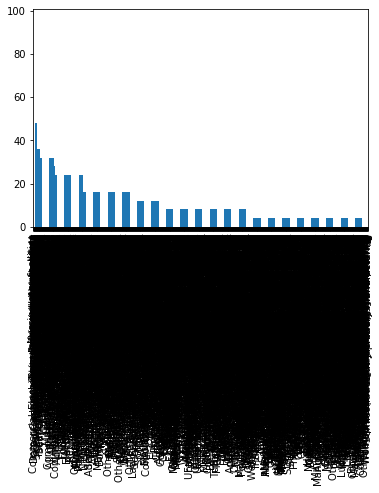

In [63]:
fig, ax = plt.subplots()
scew2007_df['industry_title'].value_counts().plot(ax=ax, kind='bar');

In [62]:
scew2007_df = scew2007_df.drop(columns = ['area_fips',
                'own_code',
                'industry_code',
                'agglvl_code',
                'size_code',
                'disclosure_code',
                'area_title',
                'own_title',
                'agglvl_title',
                'size_title',
                'lq_disclosure_code',
                'oty_disclosure_code',
                'oty_month1_emplvl_chg',
                'oty_month2_emplvl_chg',
                'oty_month3_emplvl_chg',
                'oty_total_qtrly_wages_chg',
                'oty_taxable_qtrly_wages_chg',
                'oty_qtrly_contributions_chg',
                'oty_avg_wkly_wage_chg',
                'lq_qtrly_estabs_count',
                'lq_month1_emplvl',
                'lq_month2_emplvl',
                'lq_month3_emplvl',
                'lq_total_qtrly_wages',
                'lq_taxable_qtrly_wages',
                'lq_qtrly_contributions',
                'oty_qtrly_estabs_count_chg',
                'oty_qtrly_estabs_count_pct_chg',
                'oty_month1_emplvl_pct',
                'oty_month2_emplvl_pct',
                'oty_month3_emplvl_pct',
                'oty_total_qtrly_wages_pct',
                'oty_taxable_qtrly_wages_chg',
                'oty_qtrly_contributions_pct',
                'oty_avg_wkly_wage_pct',
                'oty_taxable_qtrly_wages_chg.1',
                'lq_avg_wkly_wage',
                'taxable_qtrly_wages'], axis = 1)
                
scew2007_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19048 entries, 0 to 19047
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 19048 non-null  int64 
 1   qtr                  19048 non-null  int64 
 2   industry_title       19048 non-null  object
 3   qtrly_estabs_count   19048 non-null  int64 
 4   month1_emplvl        19048 non-null  int64 
 5   month2_emplvl        19048 non-null  int64 
 6   month3_emplvl        19048 non-null  int64 
 7   total_qtrly_wages    19048 non-null  int64 
 8   qtrly_contributions  19048 non-null  int64 
 9   avg_wkly_wage        19048 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ MB
